In [1]:
import pandas as pd
import numpy as np
import pathlib
import os
import shutil

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_pinball_loss,
)

from utils_experiment import (
    load_data,
    get_model_list,
    plot_forecasts_analysis,
    rmse,
    pinball_loss,
    average_pinball_loss,
    plot_quantile_forecast
)

# General data loading for all experiments 

In [2]:
#Identify experiments that are not in the ignore list 
exp_test_description = "Experimental_Analysis"
directory = f"/h/kupfersk/cfpr_2025/generate_forecasts/output/"

ignore_list = [".csv",
               "ipynb",
                "llama",
                "gemini",
                "claude",
                "gpt",
               "Mixtral",
               '5th',
               "restaurants",
               "DeepARModel_exp",
               "ChronosModel_exp",
               "PatchTSTModel_exp",
               "DLinearModel_exp",
               "exp7",
               "exp8",
               "corr",
               "economic",
               "human",
#                "llm",
#                "exp1",
#                "report", 
#                "covariates",
               
]

experiments_include = []

for experiment_name in os.listdir(f"{directory}{'Full_Report'}"):
    if all(keyword not in experiment_name for keyword in ignore_list):
        experiments_include.append(experiment_name)

experiments_include

['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
 'ag_local_DeepARModel',
 'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
 'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_',
 'ag_global_all_T

In [3]:

report_sim_dates = open("../generate_forecasts/experiment_cutoff_dates.txt", 'r').read().split()
# report_sim_dates = report_sim_dates[:-1]

# report_sim_dates= [report_sim_dates[-1]]

target_categories = [
    'Bakery and cereal products (excluding baby food)',
     'Dairy products and eggs',
     'Fish, seafood and other marine products',
     'Food purchased from restaurants',
     'Food',
     'Fruit, fruit preparations and nuts',
     'Meat',
     'Other food products and non-alcoholic beverages',
     'Vegetables and vegetable preparations'
]

target_categories = [f"food_cpi: {col}" for col in target_categories]

start_years = [1986]
random_seed = 42

print("Target Categories:\n" + '\n'.join(target_categories))
print("Report Simulation Dates:\n" + '\n'.join(report_sim_dates))


file_path = "../data/processed_data/all_data_processed.csv"
all_data, foodprice_df, target_categories, all_covariates = load_data(target_categories, file_path)

Target Categories:
food_cpi: Bakery and cereal products (excluding baby food)
food_cpi: Dairy products and eggs
food_cpi: Fish, seafood and other marine products
food_cpi: Food purchased from restaurants
food_cpi: Food
food_cpi: Fruit, fruit preparations and nuts
food_cpi: Meat
food_cpi: Other food products and non-alcoholic beverages
food_cpi: Vegetables and vegetable preparations
Report Simulation Dates:
2018-07-01
2019-07-01
2020-07-01
2021-07-01
2022-07-01
2023-07-01


### Ensure all necessary data is stored in Experimental_Analysis folder for easy access 

In [4]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Full_Report/"
# No need to hard-code the destination directory here; it will be determined dynamically

# Walk through the source directory to find the directories that contain '2024-07-01'
for experiment in os.listdir(source_dir):
    if experiment in experiments_include:
        print(experiment)
        
        for root, dirs, files in os.walk(f"/h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/{experiment}"):
            # Determine the destination directory dynamically by replacing 'Full_Report' with 'Forecasts'
            new_dest = root.replace("Full_Report", "Experimental_Analysis")

            # Ensure the destination directory exists, if not, create it
            os.makedirs(new_dest, exist_ok=True)

            # Move all files from the current 'root' to the new destination directory
            for file in files:
                if '.csv' in file:
                    source_file = os.path.join(root, file)
                    dest_file = os.path.join(new_dest, file)
                    shutil.copy2(source_file, dest_file)  # Use shutil.move() to move files
                    print(f"Moved {source_file} to {dest_file}")


ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2022-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2022-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2022-07-01/forecasts/food_cpi: Bakery a

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
M

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
M

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R4_/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R4_/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R4_/random_seed_42/2018-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R4_/random_seed_42/2018-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R4_/random_seed_42/2018-07-01/forecasts/food_cpi: Dair

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2022-07-01/forecasts/food

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Expe

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Dair

ag_global_cpi_with_covariates_TemporalFusionTransformerModel
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/rand

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit prepar

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/

ag_local_AutoETSModel
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2018-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2018-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/F

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecast

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusion

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransf

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Fu

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTr

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/gene

ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2023-07

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Bakery a

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_f

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_f

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_f

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_f

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimen

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimen

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2020-

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Expe

ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparation

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_f

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosModel/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_ChronosModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_ChronosM

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedFor

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedFor

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_DeepARModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fru

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_DeepARModel/random_seed_42/2022-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R4_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2021-07-01/forecasts/food_cpi: Frui

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_geopolitical_/random_seed_42/2019-07-01/forecasts/food_cpi: Frui

ag_global_all_SimpleFeedForwardModel_exp5_climate_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit prepa

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/gener

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/gener

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_loca

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2020-07-01/for

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimen

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveMode

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations an

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations an

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2019-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/rand

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2021-07-01/forecasts/food_cpi:

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2019-07-01/forecasts/food_cpi:

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv 

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2024-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv 

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_manufacturing_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv 

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_climate_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_seed_42/2021-07-01/forecasts/food_cpi: Frui

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2022-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_seed_42/2022-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food purchased from restaurants.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_ChronosModel/random_seed_42/2022-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_ChronosModel/random_see

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_202

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Expe

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R2_/random_seed_42/2022-07-01/forecasts/food_cpi: Other food products and non-alcoho

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Bakery and cereal products (excluding baby food).csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2021-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfp

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupf

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2022-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_/random_seed_42/2019-07-01/forecasts/food_cpi: Fish, seafood and other marine products.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_/random_seed_42/2019-07-01/forecasts/food_cpi: Dairy products and eggs.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_/random_seed_42/2019-07-01/forecasts/food_cpi: Dairy products and eggs.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_/random_seed_42/2019-07-01/forecasts/food_cpi: Food purchased from restaurants.

ag_local_TemporalFusionTransformerModel
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2023-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/o

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_TemporalFusionTransformerModel/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_TemporalFusionTransformerModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_TemporalFusionTransformerModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_Tem

### Define evaluation metrics and calculate mape for all periods

In [5]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Experimental_Analysis/"
experiments = experiments_include
experiments

['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
 'ag_local_DeepARModel',
 'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
 'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_',
 'ag_global_all_T

In [6]:
point_metrics = {
    "r2_score": r2_score,
    "mae": mean_absolute_error,
    "mape": mean_absolute_percentage_error,
    "mse": mean_squared_error,
    "rmse": rmse,
}

In [7]:
import json


def compute_all_scores(report_sim_dates, study_metric="mape"):
    global forecast_df
    global actual_df
    global predicted_categories
    
    results = []
    
        
#     # Load the dictionary from the JSON file
#     with open('target_category_dict_filt.json', 'r') as json_file:
#         target_category_dict = json.load(json_file)
        
    for start_year in start_years:
        for EXPERIMENT_NAME in experiments:
            predicted_categories = []
            
            print(EXPERIMENT_NAME)
            if 'ag' in EXPERIMENT_NAME :
                predicted_categories = target_categories
                if "R" not in EXPERIMENT_NAME:
                    if 'exp' in EXPERIMENT_NAME: 
                        general_experiment = f"exp{EXPERIMENT_NAME.split('_exp')[-1]}"
#                         predicted_categories_in = target_category_dict[general_experiment]
                        predicted_categories_in = predicted_categories

                        # Drop items containing the word 'restaurant' or exactly 'food_cpi: Food'
                        predicted_categories = [item for item in predicted_categories_in if 'restaurant' not in item.lower() and item != 'food_cpi: Food']


            for category in predicted_categories:
                if "restaurant" in category:
                    continue 
                    
                scores = []

                for cutoff_date in report_sim_dates:

                    forecast_csv_path = f"../generate_forecasts/output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_{random_seed}/{cutoff_date}/forecasts/{category}.csv"
                    forecast_df = pd.read_csv(forecast_csv_path, index_col=0)
                    forecast_df.index = pd.to_datetime(forecast_df.index)

                    actual_df = foodprice_df[category].loc[
                        [
                            date
                            for date in forecast_df.index
                            if date in foodprice_df.index
                        ]
                    ]
                    
                    if report_sim_dates[-1] == cutoff_date:
                        forecast_df = forecast_df.iloc[:-1]
                        actual_df = actual_df.iloc[:-1]


                    if study_metric in point_metrics:
                        median_col = "q_0.5"
                        y_pred = forecast_df[median_col]
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            point_metrics[study_metric](y_true=y_true, y_pred=y_pred)
                        )

                    elif study_metric == "pinball_loss":
                        y_pred = forecast_df
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            average_pinball_loss(
                                y_true=y_true,
                                y_pred_quantiles=y_pred,
                                quantiles=[
                                    0.01,
                                    0.05,
                                    0.1,
                                    0.25,
                                    0.75,
                                    0.9,
                                    0.95,
                                    0.99,
                                ],
                            )
                        )

                mean_score = np.mean(scores)
                std_score = np.std(scores)

                results.append(
                    {   "year": start_year,
                        "experiment": EXPERIMENT_NAME,
                        "category": category,
                        "mean_score": mean_score,
                        "std_score": std_score,
                        "scores": scores
                    }
                )

    return pd.DataFrame(results)


In [8]:
with open('../generate_forecasts/target_category_dict_filt.json', 'r') as json_file:
    target_category_dict = json.load(json_file)
    


In [9]:
## For classical model experiments 
mape_df = compute_all_scores(report_sim_dates, "mape")
mape_df

# mape_df['path']= "f'./output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_42/{cutoff_date}/forecasts/{category}.csv'"
mape_df.experiment.unique()


ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_
ag_local_DeepARModel
ag_global_all_SimpleFeedForwardModel_exp2_R4_
ag_global_all_TemporalFusionTransformerModel_exp2_R3_
ag_global_all_SimpleFeedForwardModel_exp2_R1_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel
ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_
ag_local_AutoETSModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_
ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_
ag_global_all_PatchTSTModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_
ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_
ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_
ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_
ag_global_all_TemporalFusionTransformerModel
ag_local_SimpleFeedForwardModel
ag_globa

array(['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
       'ag_local_DeepARModel',
       'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
       'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
       'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
       'ag_local_AutoETSModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
       'ag_global_all_PatchTSTModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
       'ag_global_all_SimpleFeedFor

In [10]:
mape_df.head(10)

,year,experiment,category,mean_score,std_score,scores
0,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Bakery and cereal products (excludin...,0.038190,0.035548,"[0.018224074543321752, 0.01271455186428442, 0...."
1,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Dairy products and eggs,0.028687,0.014741,"[0.021830581925373113, 0.02485608967749263, 0...."
2,1986,ag_global_all_TemporalFusionTransformerModel_e...,"food_cpi: Fish, seafood and other marine products",0.021464,0.016533,"[0.013389707090844477, 0.011075559378500145, 0..."
3,1986,ag_global_all_TemporalFusionTransformerModel_e...,"food_cpi: Fruit, fruit preparations and nuts",0.031481,0.020521,"[0.018787713047919243, 0.01953027558995098, 0...."
4,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Meat,0.024875,0.011759,"[0.01212864117484809, 0.012952361380156424, 0...."
5,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Other food products and non-alcoholi...,0.031651,0.026561,"[0.009557410596677042, 0.011857803779353212, 0..."
6,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Vegetables and vegetable preparations,0.055107,0.022773,"[0.0849194841260708, 0.033510938030742274, 0.0..."
7,1986,ag_local_DeepARModel,food_cpi: Bakery and cereal products (excludin...,0.036713,0.021999,"[0.011036732060852398, 0.019971501010228897, 0..."
8,1986,ag_local_DeepARModel,food_cpi: Dairy products and eggs,0.032611,0.016330,"[0.019867074994984066, 0.027847746093486305, 0..."
9,1986,ag_local_DeepARModel,"food_cpi: Fish, seafood and other marine products",0.022050,0.015371,"[0.010854690989193488, 0.011447317441345844, 0..."


# Figure 3. How much more often did global models end up in the top when we used curated variables


Steps:
1) load in all data
2) Do this for TemporalFusionTransformer
3) Repeat for global all and global+covariates 


In [11]:
def assign_condition(experiment):
    experiment = experiment.lower()  # Make lowercase for case-insensitive matching
    if 'covariates' in experiment:
        return 'covariates'
    elif 'local' in experiment:
        return 'local'
    elif 'global' in experiment:
        return 'global'    
    else:
        return 'all'  # Default to 'all' if none of the keywords are found

# Define the function to assign model class based on keywords in experiment names
def assign_class(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment or 'tst' in experiment: 
        return 'Transformer'

    # Check for LLM models (Chronos in this case)
    elif 'chronos' in experiment:
        return 'Foundation'

    # Check for general deep learning models
    elif 'global' in experiment:
        return 'Deep Learning'

    # Check for statistical models
    elif 'autoets' in experiment or 'arima' in experiment or 'naive' in experiment:
        return 'Statistical'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Deep Learning'
    
    
def assign_curation(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'exp1' in experiment: 
        return 'Selected by LLM'
    
    # Check for LLM models (Chronos in this case)
    elif 'exp5' in experiment:
        return 'Selected by expert defined categories'
    
    # Check for global models
    elif 'global' in experiment:
        return 'not curated'

    # Check for local models
    elif 'local' in experiment:
        return 'not curated'


    
def assign_model(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment:
        return 'TemporalFusionTransformer'
    
    # Check for LLM models (Chronos in this case)
    elif 'tst' in experiment:
        return 'PatchTST'

    # Check for LLM models (Chronos in this case)
    elif 'deepar' in experiment:
        return 'DeepAR'

    # Check for general deep learning models
    elif 'simple' in experiment:
        return 'SimpleFeedForwardNetwork'
    
    # Check for general deep learning models
    elif 'linear' in experiment:
        return 'DLinear'
    
    # Check for general deep learning models
    elif 'chronos' in experiment:
        return 'Chronos'

    # Check for statistical models
    elif 'ets' in experiment:
        return 'Exponential smoothing'
    
    # Check for statistical models
    elif 'arima' in experiment:
        return 'ARIMA'
    
    # Check for statistical models
    elif 'naive' in experiment:
        return 'Naive'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Other'

    
# Apply the function to add a new column 'condition' in filt_df
mape_df['condition'] = mape_df['experiment'].apply(assign_condition)
mape_df['class'] = mape_df['experiment'].apply(assign_class)
mape_df['model_name'] = mape_df['experiment'].apply(assign_model)
mape_df['curated'] = mape_df['experiment'].apply(assign_curation)


mape_df['curated'].unique()

array(['not curated', 'Selected by expert defined categories',
       'Selected by LLM'], dtype=object)

## Using all data including curation

In [12]:
#Define how many top models you would like to look at
number_samples = 5

# Get top 10 models by mean_score for each category
top_models_per_category = mape_df.groupby('category').apply(
    lambda x: x.nsmallest(number_samples, 'mean_score')
).reset_index(drop=True)

# Display results
top_models_per_category


,year,experiment,category,mean_score,std_score,scores,condition,class,model_name,curated
0,1986,ag_local_AutoETSModel,food_cpi: Bakery and cereal products (excludin...,0.033190,0.029725,"[0.014882080042264502, 0.008929066042039024, 0...",local,Statistical,Exponential smoothing,not curated
1,1986,ag_global_all_SimpleFeedForwardModel_exp5_geop...,food_cpi: Bakery and cereal products (excludin...,0.035196,0.026723,"[0.00801610596544404, 0.0145599506050403, 0.03...",global,Deep Learning,SimpleFeedForwardNetwork,Selected by expert defined categories
2,1986,ag_global_all_ChronosModel,food_cpi: Bakery and cereal products (excludin...,0.035216,0.024492,"[0.02530972245710051, 0.01239156869912828, 0.0...",global,Foundation,Chronos,not curated
3,1986,ag_local_NaiveModel,food_cpi: Bakery and cereal products (excludin...,0.035449,0.032692,"[0.02053964284586431, 0.009613206214303307, 0....",local,Statistical,Naive,not curated
4,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Bakery and cereal products (excludin...,0.036700,0.032053,"[0.018710904993841038, 0.017442728735350133, 0...",global,Transformer,TemporalFusionTransformer,Selected by expert defined categories
5,1986,ag_global_all_SimpleFeedForwardModel_exp5_geop...,food_cpi: Dairy products and eggs,0.021108,0.015511,"[0.007028814980968349, 0.011423657005791663, 0...",global,Deep Learning,SimpleFeedForwardNetwork,Selected by expert defined categories
6,1986,ag_local_ChronosModel,food_cpi: Dairy products and eggs,0.021389,0.009603,"[0.021225931614835616, 0.011344645235485513, 0...",local,Foundation,Chronos,not curated
7,1986,ag_global_all_ChronosModel,food_cpi: Dairy products and eggs,0.022044,0.009896,"[0.024635868320352056, 0.010438862035784969, 0...",global,Foundation,Chronos,not curated
8,1986,ag_local_AutoETSModel,food_cpi: Dairy products and eggs,0.022521,0.015436,"[0.011401594506326239, 0.010328422222780067, 0...",local,Statistical,Exponential smoothing,not curated
9,1986,ag_global_all_SimpleFeedForwardModel_exp2_R4_,food_cpi: Dairy products and eggs,0.022985,0.016606,"[0.008197565127504424, 0.008194179673736673, 0...",global,Deep Learning,SimpleFeedForwardNetwork,not curated


In [13]:

# Calculate the percentage of each 'curated' value within the top 10 per category
percentage_curated = top_models_per_category.groupby('category')['curated'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_curated

curated,Selected by LLM,Selected by expert defined categories,not curated
category,,,
food_cpi: Bakery and cereal products (excluding baby food),0.0,40.0,60.0
food_cpi: Dairy products and eggs,0.0,20.0,80.0
"food_cpi: Fish, seafood and other marine products",20.0,20.0,60.0
food_cpi: Food,0.0,0.0,100.0
"food_cpi: Fruit, fruit preparations and nuts",20.0,60.0,20.0
food_cpi: Meat,20.0,40.0,40.0
food_cpi: Other food products and non-alcoholic beverages,0.0,40.0,60.0
food_cpi: Vegetables and vegetable preparations,20.0,20.0,60.0


In [14]:
#Calculate the percentage that are global
percentage_condition = top_models_per_category.groupby('category')['condition'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_condition

condition,covariates,global,local
category,,,
food_cpi: Bakery and cereal products (excluding baby food),0.0,60.0,40.0
food_cpi: Dairy products and eggs,0.0,60.0,40.0
"food_cpi: Fish, seafood and other marine products",0.0,80.0,20.0
food_cpi: Food,0.0,60.0,40.0
"food_cpi: Fruit, fruit preparations and nuts",20.0,80.0,0.0
food_cpi: Meat,20.0,60.0,20.0
food_cpi: Other food products and non-alcoholic beverages,0.0,60.0,40.0
food_cpi: Vegetables and vegetable preparations,40.0,20.0,40.0


In [15]:
#Calculate the percentage that fall in each model class 
percentage_class = top_models_per_category.groupby('category')['class'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_class

class,Deep Learning,Foundation,Statistical,Transformer
category,,,,
food_cpi: Bakery and cereal products (excluding baby food),20.0,20.0,40.0,20.0
food_cpi: Dairy products and eggs,40.0,40.0,20.0,0.0
"food_cpi: Fish, seafood and other marine products",0.0,0.0,20.0,80.0
food_cpi: Food,0.0,40.0,20.0,40.0
"food_cpi: Fruit, fruit preparations and nuts",20.0,0.0,0.0,80.0
food_cpi: Meat,0.0,20.0,0.0,80.0
food_cpi: Other food products and non-alcoholic beverages,20.0,40.0,20.0,20.0
food_cpi: Vegetables and vegetable preparations,40.0,0.0,0.0,60.0


## Repeat to simulate before we did any type of curation

In [16]:
# Assuming mape_df is your DataFrame and 'experiment' is the column to filter
notcurated_df = mape_df[~mape_df['experiment'].str.contains('exp', case=False, na=False)].reset_index(drop=True)

# Get top 10 models by mean_score for each category
top_models_per_category_NC = notcurated_df.groupby('category').apply(
    lambda x: x.nsmallest(number_samples, 'mean_score')
).reset_index(drop=True)

# Display results
top_models_per_category_NC


,year,experiment,category,mean_score,std_score,scores,condition,class,model_name,curated
0,1986,ag_local_AutoETSModel,food_cpi: Bakery and cereal products (excludin...,0.033190,0.029725,"[0.014882080042264502, 0.008929066042039024, 0...",local,Statistical,Exponential smoothing,not curated
1,1986,ag_global_all_ChronosModel,food_cpi: Bakery and cereal products (excludin...,0.035216,0.024492,"[0.02530972245710051, 0.01239156869912828, 0.0...",global,Foundation,Chronos,not curated
2,1986,ag_local_NaiveModel,food_cpi: Bakery and cereal products (excludin...,0.035449,0.032692,"[0.02053964284586431, 0.009613206214303307, 0....",local,Statistical,Naive,not curated
3,1986,ag_local_ChronosModel,food_cpi: Bakery and cereal products (excludin...,0.036710,0.024735,"[0.032217797299566135, 0.009140157042537475, 0...",local,Foundation,Chronos,not curated
4,1986,ag_local_DeepARModel,food_cpi: Bakery and cereal products (excludin...,0.036713,0.021999,"[0.011036732060852398, 0.019971501010228897, 0...",local,Deep Learning,DeepAR,not curated
5,1986,ag_local_ChronosModel,food_cpi: Dairy products and eggs,0.021389,0.009603,"[0.021225931614835616, 0.011344645235485513, 0...",local,Foundation,Chronos,not curated
6,1986,ag_global_all_ChronosModel,food_cpi: Dairy products and eggs,0.022044,0.009896,"[0.024635868320352056, 0.010438862035784969, 0...",global,Foundation,Chronos,not curated
7,1986,ag_local_AutoETSModel,food_cpi: Dairy products and eggs,0.022521,0.015436,"[0.011401594506326239, 0.010328422222780067, 0...",local,Statistical,Exponential smoothing,not curated
8,1986,ag_local_TemporalFusionTransformerModel,food_cpi: Dairy products and eggs,0.023807,0.014608,"[0.011322252143607603, 0.017907993700903572, 0...",local,Transformer,TemporalFusionTransformer,not curated
9,1986,ag_local_SimpleFeedForwardModel,food_cpi: Dairy products and eggs,0.027710,0.012397,"[0.018980794885324247, 0.01669006429949155, 0....",local,Deep Learning,SimpleFeedForwardNetwork,not curated


In [17]:

# Calculate the percentage of each 'curated' value within the top 10 per category
percentage_curated = top_models_per_category_NC.groupby('category')['curated'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_curated

curated,not curated
category,
food_cpi: Bakery and cereal products (excluding baby food),100.0
food_cpi: Dairy products and eggs,100.0
"food_cpi: Fish, seafood and other marine products",100.0
food_cpi: Food,100.0
"food_cpi: Fruit, fruit preparations and nuts",100.0
food_cpi: Meat,100.0
food_cpi: Other food products and non-alcoholic beverages,100.0
food_cpi: Vegetables and vegetable preparations,100.0


In [18]:
# Calculate the percentage of each 'curated' value within the top 10 per category
percentage_condition_NC = top_models_per_category_NC.groupby('category')['condition'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_condition_NC

condition,covariates,global,local
category,,,
food_cpi: Bakery and cereal products (excluding baby food),0.0,20.0,80.0
food_cpi: Dairy products and eggs,0.0,20.0,80.0
"food_cpi: Fish, seafood and other marine products",20.0,0.0,80.0
food_cpi: Food,0.0,40.0,60.0
"food_cpi: Fruit, fruit preparations and nuts",20.0,0.0,80.0
food_cpi: Meat,0.0,20.0,80.0
food_cpi: Other food products and non-alcoholic beverages,0.0,20.0,80.0
food_cpi: Vegetables and vegetable preparations,20.0,20.0,60.0


In [19]:
# Calculate the percentage of each 'curated' value within the top 10 per category
percentage_class_NC = top_models_per_category_NC.groupby('category')['class'].value_counts(normalize=True).mul(100).unstack().fillna(0)
percentage_class_NC

class,Deep Learning,Foundation,Statistical,Transformer
category,,,,
food_cpi: Bakery and cereal products (excluding baby food),20.0,40.0,40.0,0.0
food_cpi: Dairy products and eggs,20.0,40.0,20.0,20.0
"food_cpi: Fish, seafood and other marine products",40.0,0.0,40.0,20.0
food_cpi: Food,0.0,40.0,40.0,20.0
"food_cpi: Fruit, fruit preparations and nuts",20.0,20.0,40.0,20.0
food_cpi: Meat,20.0,40.0,20.0,20.0
food_cpi: Other food products and non-alcoholic beverages,0.0,40.0,40.0,20.0
food_cpi: Vegetables and vegetable preparations,60.0,0.0,0.0,40.0


## Create the figures comparing the two

ValueError: shape mismatch: objects cannot be broadcast to a single shape

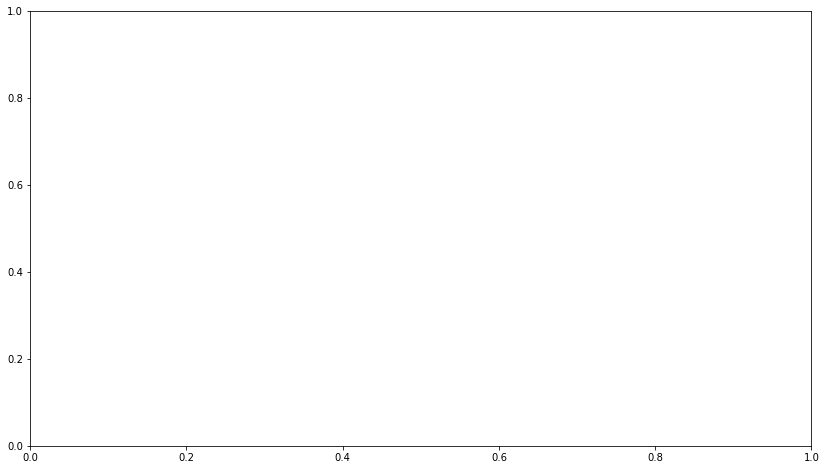

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data_pre = percentage_class_NC
data_post = percentage_class
df_pre = data_pre
df_post = data_post
# Define parameters for plotting
n_categories = len(predicted_categories)
n_classes = len(df_pre.columns)
bar_width = 0.35  # Width of each bar
x = np.arange(n_categories)  # Category positions

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each class in pre and post data
for i, col in enumerate(df_pre.columns):
    # Offset positions for pre and post bars within each class cluster
    ax.bar(x - bar_width/2 + i * (bar_width/n_classes), df_pre[col], bar_width / n_classes,
           label=f'{col} (Pre)', align='center')
    ax.bar(x + bar_width/2 + i * (bar_width/n_classes), df_post[col], bar_width / n_classes,
           label=f'{col} (Post)', align='center')

# Formatting
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Pre and Post Data by Class and Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Simplify category names to just the second word for titles
simple_categories = [category.split()[1] for category in categories]

# Define figure size to make plots more readable
fig, axes = plt.subplots(4, 4, figsize=(18, 16), constrained_layout=True)

# Define consistent colors for each class
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
class_labels = list(data_pre.keys())

# Custom function to show percentages only if > 0
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

# Generate pie charts for each category, organizing in a 4x4 grid
for i, category in enumerate(simple_categories):
    row = i // 2           # Determine row in 4x4 grid (two pairs per row)
    col_pre = (i % 2) * 2  # Left position for "pre" data in each pair (0, 2)
    col_post = col_pre + 1 # Right position for "post" data in each pair

    # Plot pre data in the current cell with custom autopct
    wedges = axes[row, col_pre].pie(
        [data_pre[class_][i] for class_ in data_pre],
        labels=None,  
        autopct=custom_autopct, startangle=90, colors=colors, wedgeprops={'alpha': 0.8, 'edgecolor': 'gray'}
    )
    axes[row, col_pre].set_title(f'{category} (No Curation)', fontsize=14, loc='center')  # Increased font size

    # Add a legend only on every second subplot
#     if i % 2 == 0:
#         axes[row, col_pre].legend(wedges[0], class_labels, loc="upper right", bbox_to_anchor=(1.3, 0.8), fontsize=10)

    # Plot post data in the adjacent cell with custom autopct
    wedges_post = axes[row, col_post].pie(
        [data_post[class_][i] for class_ in data_post],
        labels=None,
        autopct=custom_autopct, startangle=90, colors=colors
    )
    axes[row, col_post].set_title(f'{category} (Curated)', fontsize=14, loc='center')  # Increased font size

    # Add legend to every second "post" pie chart as well
    if i % 2 == 0:
        axes[row, col_post].legend(wedges_post[0], class_labels, loc="lower center", bbox_to_anchor=(1.3, 0.8), fontsize=10)

# Adjust layout to keep subplots close without overlap
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

NameError: name 'categories' is not defined

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Simplify category names to just the second word for titles
simple_categories = [category.split()[1] for category in categories]

# Define figure size to make plots more readable
fig, axes = plt.subplots(4, 4, figsize=(18, 16), constrained_layout=True)

# Define consistent colors for each class
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
class_labels = list(data_pre.keys())

# Custom function to show percentages only if > 0
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

# Generate pie charts for each category, organizing in a 4x4 grid
for i, category in enumerate(simple_categories):
    row = i // 2           # Determine row in 4x4 grid (two pairs per row)
    col_pre = (i % 2) * 2  # Left position for "pre" data in each pair (0, 2)
    col_post = col_pre + 1 # Right position for "post" data in each pair

    # Plot pre data in the current cell with custom autopct
    wedges = axes[row, col_pre].pie(
        [data_pre[class_][i] for class_ in data_pre],
        labels=None,  
        autopct=custom_autopct, startangle=90, colors=colors, wedgeprops={'alpha': 0.8, 'edgecolor': 'gray'}
    )
    axes[row, col_pre].set_title(f'{category} (No Curation)', fontsize=16, loc='center')  # Increased font size

    # Add a legend only on every second subplot
#     if i % 2 == 0:
#         axes[row, col_pre].legend(wedges[0], class_labels, loc="upper right", bbox_to_anchor=(1.3, 0.8), fontsize=12)

    # Plot post data in the adjacent cell with custom autopct
    wedges_post = axes[row, col_post].pie(
        [data_post[class_][i] for class_ in data_post],
        labels=None,
        autopct=cus


SyntaxError: unexpected EOF while parsing (4115193686.py, line 42)

In [ ]:
categories